# Dataset

In [74]:
import numpy as np
dataset = np.load('proyecto_training_data.npy')
print(type(dataset))
print(dataset.shape)

<class 'numpy.ndarray'>
(1460, 6)


In [75]:
for iteracion in dataset:
    print(iteracion)

[2.085e+05 7.000e+00 8.560e+02 8.000e+00 2.003e+03 6.500e+01]
[1.815e+05 6.000e+00 1.262e+03 6.000e+00 1.976e+03 8.000e+01]
[2.235e+05 7.000e+00 9.200e+02 6.000e+00 2.001e+03 6.800e+01]
[1.400e+05 7.000e+00 9.610e+02 7.000e+00 1.915e+03 6.000e+01]
[2.500e+05 8.000e+00 1.145e+03 9.000e+00 2.000e+03 8.400e+01]
[1.430e+05 5.000e+00 7.960e+02 5.000e+00 1.993e+03 8.500e+01]
[3.070e+05 8.000e+00 1.694e+03 7.000e+00 2.004e+03 7.500e+01]
[2.000e+05 7.000e+00 1.107e+03 7.000e+00 1.973e+03       nan]
[1.299e+05 7.000e+00 1.022e+03 8.000e+00 1.931e+03 5.100e+01]
[1.180e+05 5.000e+00 1.077e+03 5.000e+00 1.939e+03 5.000e+01]
[1.295e+05 5.000e+00 1.040e+03 5.000e+00 1.965e+03 7.000e+01]
[3.450e+05 9.000e+00 1.182e+03 1.100e+01 2.005e+03 8.500e+01]
[1.440e+05 5.000e+00 9.120e+02 4.000e+00 1.962e+03       nan]
[2.795e+05 7.000e+00 1.494e+03 7.000e+00 2.006e+03 9.100e+01]
[1.570e+05 6.000e+00 1.253e+03 5.000e+00 1.960e+03       nan]
[1.320e+05 7.000e+00 8.540e+02 5.000e+00 1.929e+03 5.100e+01]
[1.490e+

[1.875e+05 7.000e+00 1.146e+03 6.000e+00 2.003e+03 7.300e+01]
[2.225e+05 7.000e+00 1.153e+03 8.000e+00 1.998e+03 7.500e+01]
[1.314e+05 5.000e+00 1.144e+03 6.000e+00 1.961e+03 8.000e+01]
[1.080e+05 5.000e+00 9.480e+02 6.000e+00 1.968e+03       nan]
[1.630e+05 7.000e+00 8.800e+02 6.000e+00 1.914e+03 6.000e+01]
[9.35e+04 3.00e+00 1.04e+03 6.00e+00 1.95e+03 6.00e+01]
[2.399e+05 8.000e+00 9.010e+02 8.000e+00 2.005e+03 7.200e+01]
[1.790e+05 5.000e+00 1.200e+03 5.000e+00 1.987e+03 6.000e+01]
[1.900e+05 7.000e+00 8.640e+02 7.000e+00 2.004e+03 6.500e+01]
[1.32e+05 5.00e+00 7.68e+02 7.00e+00 1.91e+03 6.00e+01]
[1.420e+05 6.000e+00 9.120e+02 5.000e+00 1.961e+03 6.500e+01]
[1.790e+05 7.000e+00 1.349e+03 6.000e+00 2.000e+03 6.500e+01]
[1.750e+05 5.000e+00 1.464e+03 6.000e+00 1.963e+03 7.000e+01]
[1.800e+05 8.000e+00 1.337e+03 5.000e+00 1.993e+03 4.100e+01]
[2.998e+05 8.000e+00 1.175e+03 1.100e+01 1.976e+03       nan]
[2.36e+05 7.00e+00 9.80e+02 8.00e+00 2.00e+03      nan]
[2.65979e+05 7.00000e+00 1

[1.150e+05 5.000e+00 8.640e+02 5.000e+00 1.955e+03 6.000e+01]
[1.385e+05 5.000e+00 1.052e+03 5.000e+00 1.968e+03 7.000e+01]
[1.550e+05 5.000e+00 1.128e+03 6.000e+00 1.963e+03 8.000e+01]
[1.400e+05 6.000e+00 1.072e+03 5.000e+00 2.005e+03 3.500e+01]
[1.600e+05 1.000e+01 4.692e+03 1.200e+01 2.008e+03 3.130e+02]
[1.540e+05 5.000e+00 1.246e+03 6.000e+00 1.959e+03 7.500e+01]
[2.250e+05 7.000e+00 1.005e+03 9.000e+00 1.999e+03       nan]
[1.775e+05 6.000e+00 7.530e+02 7.000e+00 1.942e+03       nan]
[2.900e+05 8.000e+00 1.203e+03 8.000e+00 1.994e+03 9.200e+01]
[2.320e+05 7.000e+00 1.616e+03 7.000e+00 2.005e+03 7.300e+01]
[1.300e+05 7.000e+00 9.760e+02 7.000e+00 2.004e+03 3.200e+01]
[3.250e+05 9.000e+00 1.652e+03 6.000e+00 2.006e+03 1.080e+02]
[2.025e+05 7.000e+00 1.368e+03 6.000e+00 2.005e+03 4.800e+01]
[1.380e+05 5.000e+00 9.900e+02 5.000e+00 1.994e+03 6.000e+01]
[1.470e+05 5.000e+00 1.122e+03 6.000e+00 1.948e+03 1.000e+02]
[1.792e+05 6.000e+00 1.294e+03 6.000e+00 1.991e+03       nan]
[3.350e+

# Cantidad de datos de entrenamiento y datos de prueba

In [76]:
print(dataset.shape)
c_entrenamiento = int(0.8*dataset.shape[0])
c_validacion = int(0.2*dataset.shape[0])
print(c_entrenamiento) #80% de los datos
print(c_validacion) # 20% de los datos

(1460, 6)
1168
292


In [77]:
print(dataset.shape)
c_entrenamiento = 0.8*dataset.shape[0]
c_validacion = 0.2*dataset.shape[0]
print(c_entrenamiento) #80% de los datos
print(c_validacion) # 20% de los datos

(1460, 6)
1168.0
292.0


# Almacenamiento del 80% y 20% de datos en variables

In [78]:
d_entrenamiento = dataset[:int(c_entrenamiento)]
d_entrenamiento.shape

(1168, 6)

In [79]:
d_validacion = dataset[:int(c_validacion)]
d_validacion.shape

(292, 6)

# Dataset de Entrenamiento

In [80]:
for i in d_validacion:
    print(i)

[2.085e+05 7.000e+00 8.560e+02 8.000e+00 2.003e+03 6.500e+01]
[1.815e+05 6.000e+00 1.262e+03 6.000e+00 1.976e+03 8.000e+01]
[2.235e+05 7.000e+00 9.200e+02 6.000e+00 2.001e+03 6.800e+01]
[1.400e+05 7.000e+00 9.610e+02 7.000e+00 1.915e+03 6.000e+01]
[2.500e+05 8.000e+00 1.145e+03 9.000e+00 2.000e+03 8.400e+01]
[1.430e+05 5.000e+00 7.960e+02 5.000e+00 1.993e+03 8.500e+01]
[3.070e+05 8.000e+00 1.694e+03 7.000e+00 2.004e+03 7.500e+01]
[2.000e+05 7.000e+00 1.107e+03 7.000e+00 1.973e+03       nan]
[1.299e+05 7.000e+00 1.022e+03 8.000e+00 1.931e+03 5.100e+01]
[1.180e+05 5.000e+00 1.077e+03 5.000e+00 1.939e+03 5.000e+01]
[1.295e+05 5.000e+00 1.040e+03 5.000e+00 1.965e+03 7.000e+01]
[3.450e+05 9.000e+00 1.182e+03 1.100e+01 2.005e+03 8.500e+01]
[1.440e+05 5.000e+00 9.120e+02 4.000e+00 1.962e+03       nan]
[2.795e+05 7.000e+00 1.494e+03 7.000e+00 2.006e+03 9.100e+01]
[1.570e+05 6.000e+00 1.253e+03 5.000e+00 1.960e+03       nan]
[1.320e+05 7.000e+00 8.540e+02 5.000e+00 1.929e+03 5.100e+01]
[1.490e+

# Almacenamiento de 5 variables independientes y el Costo

In [228]:
y = d_entrenamiento[:,0]
x1=d_entrenamiento[:,1]
x2 = d_entrenamiento[:,2]
x3 = d_entrenamiento[:,3]
x4 = d_entrenamiento[:,4]
x5 = np.isnan(d_entrenamiento[:,5])
#print(x5.shape)

# Media, Valor Máximo, Valor Mínimo, Rango

In [229]:
#Cálculo de medias
media1 = np.nanmean(x1)
media2 = np.nanmean(x2)
media3 = np.nanmean(x3)
media4 = np.nanmean(x4)
media5 = np.nanmean(x5)
#cálculo de valores máximos
max1=np.nanmax(x1)
max2=np.nanmax(x2)
max3=np.nanmax(x3)
max4=np.nanmax(x4)
max5=np.nanmax(x5)
#cálculo de valores mínimos
min1=np.nanmin(x1)
min2=np.nanmin(x2)
min3=np.nanmin(x3)
min4=np.nanmin(x4)
min5=np.nanmin(x5)
#desviacion estandar
ds1=np.nanstd(x1)
ds2=np.nanstd(x2)
ds3=np.nanstd(x3)
ds4=np.nanstd(x4)
ds5=np.nanstd(x5)

# Graficos

In [11]:
import seaborn as sns
type(x1)
media1 = np.nanmedian(x1)
print(media1)
print(np.mean(x1))

6.0
6.101027397260274


6.0


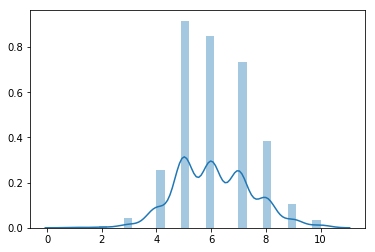

In [13]:
vis1 = sns.distplot(x1[:1168],bins = 30)
print(media1)

1156.3236301369864


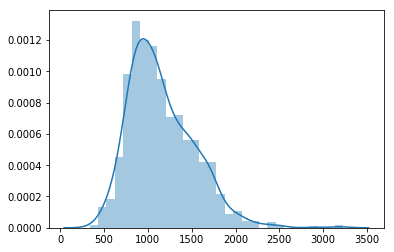

In [14]:
vis2 = sns.distplot(x2[:1168])
print(media2)

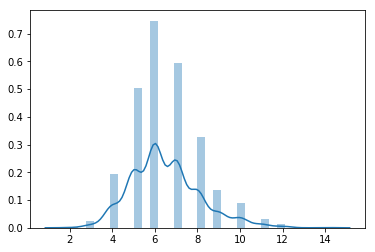

In [15]:
vis3 = sns.distplot(x3[:1168])

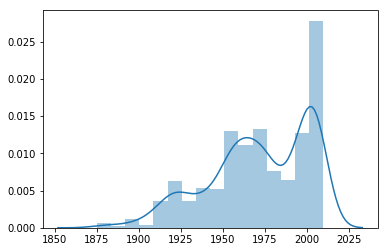

In [16]:
vis4 = sns.distplot(x4[:1168])

In [232]:
#vis5 = sns.distplot(x5[:1168],)

# Encontrando correlacion entre variables

In [231]:
correlacion1=np.corrcoef(y[:-1], x1[:-1])[1,0]
correlacion2=np.corrcoef(y[:-1], x2[:-1])[1,0]
correlacion3=np.corrcoef(y[:-1], x3[:-1])[1,0]
correlacion4=np.corrcoef(y[:-1], x4[:-1])[1,0]
correlacion5=np.corrcoef(y[:-1], x5[:-1])[1,0]
print(correlacion1,correlacion2,correlacion3,correlacion4,correlacion5)

0.7939889829970328 0.6163212083344694 0.5647603608321817 0.5344598012302593 -0.011120172332702408


In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Coeficiente 0.7939889829970328')

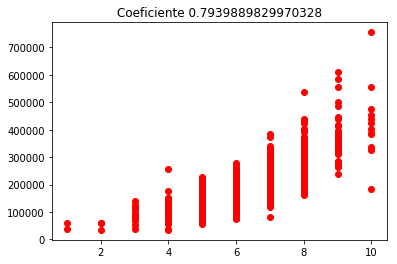

In [21]:
plt.plot(x1,y,'ro')
plt.title('Coeficiente 0.7939889829970328')

Text(0.5, 1.0, 'Coeficiente 0.6163212083344694')

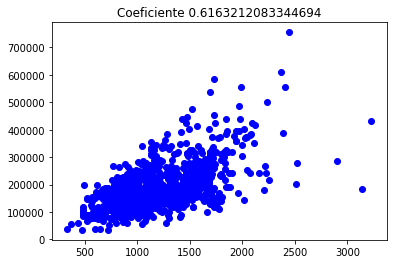

In [22]:
plt.plot(x2,y,'bo')
plt.title('Coeficiente 0.6163212083344694')

Text(0.5, 1.0, 'Coeficiente 0.5647603608321817')

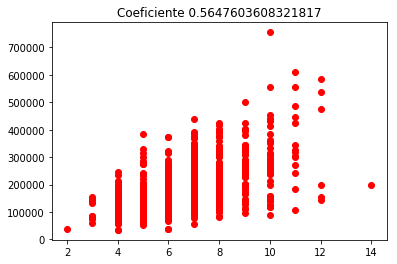

In [23]:
plt.plot(x3,y,'ro')
plt.title('Coeficiente 0.5647603608321817')

Text(0.5, 1.0, 'Coeficiente 0.5344598012302593')

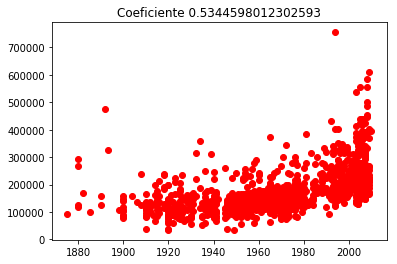

In [24]:
plt.plot(x4,y,'ro')
plt.title('Coeficiente 0.5344598012302593')

Text(0.5, 1.0, 'Coeficiente')

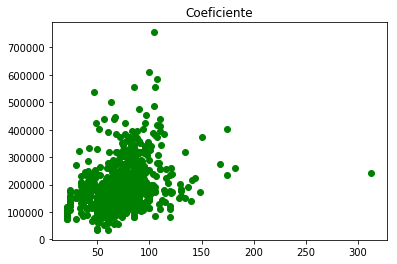

In [26]:
plt.plot(x5,y,'go')
plt.title('Coeficiente')

# Creación de Matriz 

In [218]:
mat_prueba = (np.vstack((x1,np.ones_like(x1)))).T
mat_prueba.shape

(1168, 2)

# Inicialización de valores

In [219]:
import pandas as pd
epochs = 50
imprimir_error_cada = 10
lr = 0.003

# Función Entrenadora del modelo

In [221]:
def linealRegression(ejey, ejex, iteraciones, impresiones, lr):
    mo=bo=p=0
    mb = np.array([mo,bo])
    ve = []
    mat_prueba
    for ciclo_iteraciones in range(epochs):  
        p += 1
        yhat=np.matmul(mat_prueba,mb) #
        delta = 1/2*(np.mean((y-yhat)**2))
        variacion = (np.array([yhat-y,yhat-y])).T
        grad = np.mean(variacion*mat_prueba)
        mb = mb - lr*grad
        ve.append(delta)
        if(p == imprimir_error_cada):
            p = 0
            print(delta)
    final = np.array([yhat,ve])
    return(final) 

# Prueba

In [222]:
linealRegression(y, x1,epochs, imprimir_error_cada, lr)

5622091374.181836
2313454098.1030827
1668219942.3556201
1542389553.2848186
1517850730.1728165


array([array([205435.34034224, 179755.92279946, 205435.34034224, ...,
       205435.34034224, 231114.75788502, 179755.92279946]),
       list([19409722053.22175, 16710620574.103903, 14418560309.490406, 12472156924.04337, 10819283220.254198, 9415673104.743502, 8223736085.086463, 7211550547.857001, 6352008856.575959, 5622091374.181836, 5002249967.407799, 4475884482.515679, 4028898171.730672, 3649320164.122251, 3326984870.2137127, 3053259734.3615613, 2820814043.7617035, 2623422602.4889197, 2455799012.7067347, 2313454098.1030827, 2192575677.9484386, 2089926471.9703557, 2002757401.8050547, 1928733967.1269, 1865873724.7133904, 1812493196.05425, 1767162781.6217902, 1728668474.3484445, 1695979346.9489462, 1668219942.3556201, 1644646827.8469768, 1624628684.9588833, 1607629401.9603982, 1593193716.0889347, 1580935021.0252585, 1570525013.0767426, 1561684898.780299, 1554177928.453217, 1547803055.7307727, 1542389553.2848186, 1537792440.5253477, 1533888600.8329718, 1530573484.3367813, 1527758307.9337

# Regresion Lineal 

In [222]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd